In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Single Variable

### Read data from CSV file

In [2]:
data1 = pd.read_csv("Book1.csv")

### visualize data set

In [7]:
data1

,Unnamed: 0,videos,views
0,channel1,30,34000
1,channel2,40,41000
2,channel3,50,42500
3,channel4,60,54300
4,channel5,70,56000


In [8]:
data1.head()

,Unnamed: 0,videos,views
0,channel1,30,34000
1,channel2,40,41000
2,channel3,50,42500
3,channel4,60,54300
4,channel5,70,56000


In [6]:
data1.head(2)

,Unnamed: 0,videos,views
0,channel1,30,34000
1,channel2,40,41000


### Plot data points

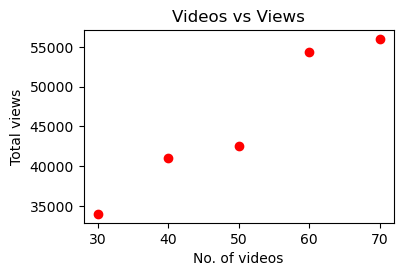

In [19]:
plt.figure(figsize=(4, 2.5)) 
plt.scatter(data1.videos, data1.views, color="red")
plt.title("Videos vs Views")
plt.xlabel("No. of videos")
plt.ylabel("Total views")
plt.show()

In [17]:
data1.videos

0    30
1    40
2    50
3    60
4    70
Name: videos, dtype: int64

In [18]:
data1.views

0    34000
1    41000
2    42500
3    54300
4    56000
Name: views, dtype: int64

### Convert to numpy array

In [20]:
x = np.array(data1.videos.values)
x

array([30, 40, 50, 60, 70], dtype=int64)

In [21]:
y = np.array(data1.views.values)
y

array([34000, 41000, 42500, 54300, 56000], dtype=int64)

In [23]:

# Object for LinearRegression class
model = LinearRegression()

# Train model
model.fit(x.reshape(-1,1), y)


# x = np.array([10, 20, 30, 40])
# print(x.reshape(-1, 1)) ---> [[10], [20], [30], [40]]

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Plot the best fit

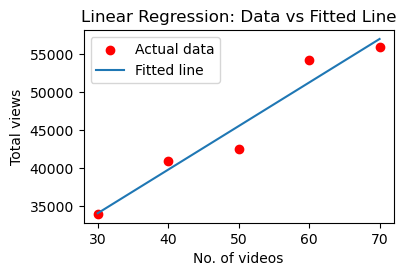

In [25]:
plt.figure(figsize=(4, 2.5)) 
plt.scatter(data1.videos, data1.views, color="red", label='Actual data')

m, c = np.polyfit(x, y, 1)
plt.plot(x, m*x+c, label='Fitted line')

plt.title("Linear Regression: Data vs Fitted Line")
plt.xlabel("No. of videos")
plt.ylabel("Total views")
plt.legend()
plt.show()

### Prediction using trained model

In [26]:
new_x = np.array([45]).reshape(-1,1)
new_x

array([[45]])

In [27]:
predict_views = model.predict(new_x)
predict_views

array([42695.])

In [28]:
m, c

(572.9999999999997, 16910.00000000002)

### Using equation y = mx + c

In [29]:
y_new = m*45 + c
y_new

42695.0

# Multiple Variable

In [30]:
data = pd.read_csv("Book2.csv")

In [31]:
data.head()

,Unnamed: 0,videos,days,subscribers,views
0,channel 1,30,150,1800,34000
1,channel 2,40,212,1950,41000
2,channel 3,50,179,2100,42500
3,channel 4,60,346,4300,54300
4,channel 5,70,280,4200,56000


In [32]:
model = LinearRegression()
model.fit(data[['videos', 'days', 'subscribers']], data.views)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [36]:
# Assuming you trained with columns ['feature1', 'feature2', 'feature3']
# new_data = pd.DataFrame([[45, 180, 3100]], columns=['feature1', 'feature2', 'feature3'])

y_new = model.predict([[45, 180, 3100]])
y_new

C:\ARC pro\bin\Python\envs\arcgispro-py3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41483.5043287])

In [38]:
new_data = pd.DataFrame([[45, 180, 3100]], columns=['videos', 'days', 'subscribers'])
y_new = model.predict(new_data)
print(y_new)

[41483.5043287]


### Using equation

In [45]:
x = [45, 180, 3100]

In [42]:
m = model.coef_
m

array([3.81732131e+02, 4.21209097e+01, 3.54006782e-01])

In [44]:
c = model.intercept_
c

15626.373669488301

In [46]:
y_new = m[0]*x[0] + m[1]*x[1] + m[2]*x[2] + c
print(y_new)

41483.504328703
